### Walkthrough of the Marketing Mix Model
For this project, we’re going to use a fictional dataset that consists of marketing spend on TV, radio, and newspaper, as well as the corresponding dollar sales by period.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv(r'E:\Datasetss\Advertising.csv')

In [3]:
data.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
print(data.columns)

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


In [5]:
data=data.copy().drop(['Unnamed: 0'],axis=1)

In [6]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<AxesSubplot:>

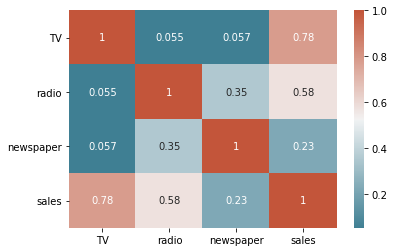

In [7]:
corr=data.corr()
sns.heatmap(corr, xticklabels=corr.columns,
           yticklabels=corr.columns, annot=True,
           cmap=sns.diverging_palette(220,20,as_cmap=True))

Immediately, we can see that there’s a strong correlation between TV and sales (0.78), a moderate correlation between radio and sales (0.58), and a weak correlation between newspaper and sales (0.23). It’s still too early to conclude anything but this is good to keep into consideration moving forward.

Similarly to the correlation matrix, I want to create a pairplot of my variables so that I can understand the relationships between my variables even more.

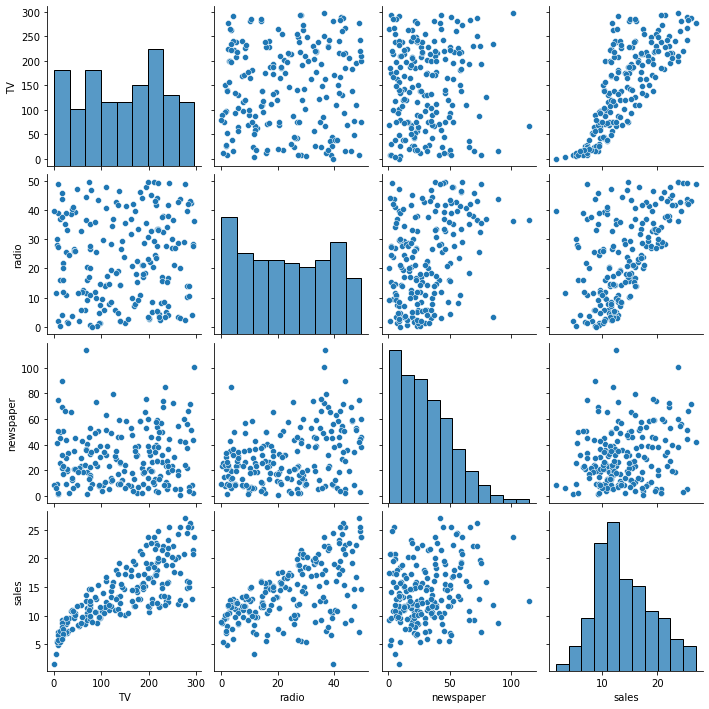

In [8]:
sns.pairplot(data)

This seems to be in line with the correlation matrix, as there appears to be a strong relationship between TV and sales, less for radio, and even less for newspapers.

### Feature Importance

Feature importance allows you to determine how “important” each input variable is to predict the output variable. A feature is important if shuffling its values increases model error because this means the model relied on the feature for the prediction.
We’re going to quickly create a random forest model so that we can determine the importance of each feature.

<AxesSubplot:>

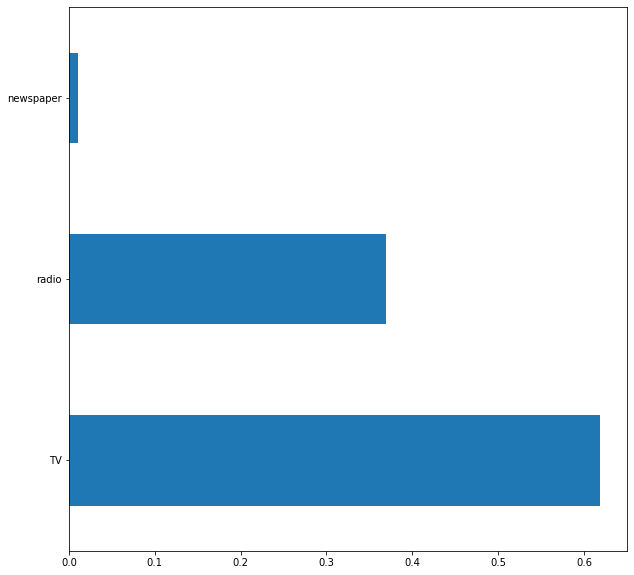

In [9]:
# Setting X and y variables
X = data.loc[:, data.columns != 'sales']
y = data['sales']
# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [10]:
import statsmodels.formula.api as sm
model = sm.ols(formula="sales~TV+radio+newspaper", data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 23 Jun 2021   Prob (F-statistic):           1.58e-96
Time:                        16:07:30   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

summary() provides us with an abundance of insights on our model. 

The Adj. R-squared is 0.896, which means that almost 90 of all variations in our data can be explained by our model, which is pretty good! 

The p-values for TV and radio are less than 0.000, but the p-value for newspaper is 0.86, which indicates that newspaper spend has no significant impact on sales.

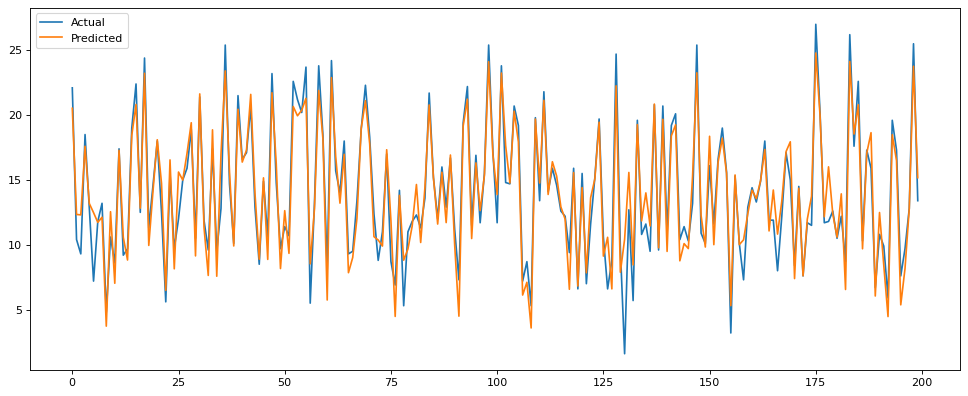

In [11]:
# Defining Actual and Predicted values
y_pred = model.predict()
labels = data['sales']
data_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
data_temp.head()
# Creating Line Graph
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = data_temp['Actual']
y2 = data_temp['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()


In reality, the data probably won’t be as clean as this and the results probably won’t look as pretty. In practice, you’ll probably want to consider more variables that impact sales, including but not limited to:

Seasonality: It’s almost always the case that company sales are seasonal. For example, a snowboard company’s sales would be much higher during the winter than in the summer. In practice, you’ll want to include a variable to account for seasonality.

Carryover Effects: The impact of marketing is not usually immediate. In many cases, consumers need time to think about their purchasing decisions after seeing advertisements. Carryover effects account for the time lag between when consumers are exposed to an ad and their response to the ad.

Base sales vs incremental sales: Not every sale is attributed to marketing. If a company spent absolutely nothing on marketing and still made sales, this would be called its base sales. Thus, to take it a step further, you could try to model advertising spend on incremental sales as opposed to total sales.